In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('E:\Intern Tasks\ICBHI_final_database\Book1.xlsx')

In [2]:
df.head()

,Patient number,Recording index,Chest location,Acquisition mode,Recording equipment,Beginning of respiratory cycle,End of respiratory cycle,Crackles,Wheezes,Age,Sex,BMI(Adult),Height(Child),Weight(Child),Label,Column1
0,101,1b1,Al,sc,Meditron,0.036,0.579,0,0,3.0,F,NaN,99.0,19.0,URTI,test
1,101,1b1,Al,sc,Meditron,0.579,2.450,0,0,3.0,F,NaN,99.0,19.0,URTI,test
2,101,1b1,Al,sc,Meditron,2.450,3.893,0,0,3.0,F,NaN,99.0,19.0,URTI,test
3,101,1b1,Al,sc,Meditron,3.893,5.793,0,0,3.0,F,NaN,99.0,19.0,URTI,test
4,101,1b1,Al,sc,Meditron,5.793,7.521,0,0,3.0,F,NaN,99.0,19.0,URTI,test


In [3]:
df.shape

(6898, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient number                  6898 non-null   int64  
 1   Recording index                 6898 non-null   object 
 2   Chest location                  6898 non-null   object 
 3   Acquisition mode                6898 non-null   object 
 4   Recording equipment             6898 non-null   object 
 5   Beginning of respiratory cycle  6898 non-null   float64
 6   End of respiratory cycle        6898 non-null   float64
 7   Crackles                        6898 non-null   int64  
 8   Wheezes                         6898 non-null   int64  
 9   Age                             6837 non-null   float64
 10  Sex                             6837 non-null   object 
 11  BMI(Adult)                      6004 non-null   float64
 12  Height(Child)                   72

In [5]:
df.describe()

,Patient number,Beginning of respiratory cycle,End of respiratory cycle,Crackles,Wheezes,Age,BMI(Adult),Height(Child),Weight(Child)
count,6898.000000,6898.000000,6898.000000,6898.000000,6898.000000,6837.000000,6004.000000,726.000000,749.000000
mean,163.159322,10.680312,13.380821,0.343578,0.201798,61.955494,26.276126,95.233058,16.921736
std,33.434777,9.871169,10.032744,0.474937,0.401371,22.873476,5.700560,24.521615,12.261544
min,101.000000,0.000000,0.250000,0.000000,0.000000,0.250000,16.500000,64.000000,7.140000
25%,134.000000,4.042000,6.820250,0.000000,0.000000,58.000000,22.860000,76.000000,11.000000
50%,160.000000,9.336000,12.125000,0.000000,0.000000,68.000000,27.400000,94.000000,13.000000
75%,193.000000,14.826250,17.671000,1.000000,0.000000,75.000000,29.410000,103.000000,16.700000
max,226.000000,84.365000,86.200000,1.000000,1.000000,93.000000,53.500000,183.000000,80.000000


## Data pre-processing

In [6]:
null_values = df.isnull().sum()
null_values

Patient number                       0
Recording index                      0
Chest location                       0
Acquisition mode                     0
Recording equipment                  0
Beginning of respiratory cycle       0
End of respiratory cycle             0
Crackles                             0
Wheezes                              0
Age                                 61
Sex                                 61
BMI(Adult)                         894
Height(Child)                     6172
Weight(Child)                     6149
Label                                0
Column1                              0
dtype: int64

In [7]:
df['Label'].replace(['Healthy','URTI', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis','Pneumonia', 'Bronchiolitis'],[1,0,0,0,0,0,0,0],inplace=True)
df.head()

,Patient number,Recording index,Chest location,Acquisition mode,Recording equipment,Beginning of respiratory cycle,End of respiratory cycle,Crackles,Wheezes,Age,Sex,BMI(Adult),Height(Child),Weight(Child),Label,Column1
0,101,1b1,Al,sc,Meditron,0.036,0.579,0,0,3.0,F,NaN,99.0,19.0,0,test
1,101,1b1,Al,sc,Meditron,0.579,2.450,0,0,3.0,F,NaN,99.0,19.0,0,test
2,101,1b1,Al,sc,Meditron,2.450,3.893,0,0,3.0,F,NaN,99.0,19.0,0,test
3,101,1b1,Al,sc,Meditron,3.893,5.793,0,0,3.0,F,NaN,99.0,19.0,0,test
4,101,1b1,Al,sc,Meditron,5.793,7.521,0,0,3.0,F,NaN,99.0,19.0,0,test


In [8]:
df = df.fillna(0)
df = df.drop(['Recording index'],axis = 1)

### Train-test split

In [9]:
df_train = df[df['Column1']=='train']
y_train = df_train.Label
x_train = df_train.drop(['Label','Column1','Patient number'], axis=1)

In [10]:
df_test = df[df['Column1']=='test']
y_test = df_test.Label
x_test = df_test.drop(['Label','Column1','Patient number'], axis=1)

### Handling categorical values

In [11]:
s = (x_train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['Chest location', 'Acquisition mode', 'Recording equipment', 'Sex']

In [12]:
from sklearn.preprocessing import OneHotEncoder
oh_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
oh_cols_train = pd.DataFrame(oh_enc.fit_transform(x_train[object_cols]))
oh_cols_test = pd.DataFrame(oh_enc.transform(x_test[object_cols]))

In [13]:
oh_cols_train.index = x_train.index
oh_cols_test.index = x_test.index

num_x_train = x_train.drop(object_cols, axis=1)
num_x_test = x_test.drop(object_cols, axis=1)

oh_x_train = pd.concat([num_x_train, oh_cols_train], axis=1)
oh_x_test = pd.concat([num_x_test, oh_cols_test], axis=1)

## Model training

### Approach 1: Base Model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
log_classifier = LogisticRegression(max_iter=1000)
log_classifier.fit(oh_x_train,y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred = log_classifier.predict(oh_x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2461
           1       0.48      0.22      0.30       175

    accuracy                           0.93      2636
   macro avg       0.71      0.60      0.63      2636
weighted avg       0.92      0.93      0.92      2636



In [16]:
from sklearn.ensemble import RandomForestClassifier
ranfr_classifier = RandomForestClassifier()
ranfr_classifier.fit(oh_x_train, y_train)

RandomForestClassifier()

In [17]:
Y_pred = ranfr_classifier.predict(oh_x_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2461
           1       0.67      0.34      0.45       175

    accuracy                           0.94      2636
   macro avg       0.81      0.67      0.71      2636
weighted avg       0.94      0.94      0.94      2636



### Approach 2: Calculating BMI for children

In [18]:
x = df[df["BMI(Adult)"] == 0.0].iloc[:,12].values/(df[df["BMI(Adult)"] == 0.0].iloc[:,11].values*0.01)**2

<ipython-input-18-df85e1e9c6aa>:1: RuntimeWarning: divide by zero encountered in true_divide
  x = df[df["BMI(Adult)"] == 0.0].iloc[:,12].values/(df[df["BMI(Adult)"] == 0.0].iloc[:,11].values*0.01)**2
<ipython-input-18-df85e1e9c6aa>:1: RuntimeWarning: invalid value encountered in true_divide
  x = df[df["BMI(Adult)"] == 0.0].iloc[:,12].values/(df[df["BMI(Adult)"] == 0.0].iloc[:,11].values*0.01)**2


In [19]:
df.loc[df["BMI(Adult)"] == 0.0,"BMI(Adult)"] = x

In [20]:
df.head()

,Patient number,Chest location,Acquisition mode,Recording equipment,Beginning of respiratory cycle,End of respiratory cycle,Crackles,Wheezes,Age,Sex,BMI(Adult),Height(Child),Weight(Child),Label,Column1
0,101,Al,sc,Meditron,0.036,0.579,0,0,3.0,F,19.385777,99.0,19.0,0,test
1,101,Al,sc,Meditron,0.579,2.450,0,0,3.0,F,19.385777,99.0,19.0,0,test
2,101,Al,sc,Meditron,2.450,3.893,0,0,3.0,F,19.385777,99.0,19.0,0,test
3,101,Al,sc,Meditron,3.893,5.793,0,0,3.0,F,19.385777,99.0,19.0,0,test
4,101,Al,sc,Meditron,5.793,7.521,0,0,3.0,F,19.385777,99.0,19.0,0,test


In [21]:
df=df[df["BMI(Adult)"] < 10000]

In [22]:
df.isna().sum()

Patient number                    0
Chest location                    0
Acquisition mode                  0
Recording equipment               0
Beginning of respiratory cycle    0
End of respiratory cycle          0
Crackles                          0
Wheezes                           0
Age                               0
Sex                               0
BMI(Adult)                        0
Height(Child)                     0
Weight(Child)                     0
Label                             0
Column1                           0
dtype: int64

In [23]:
df=df.dropna()
df.isna().sum()

Patient number                    0
Chest location                    0
Acquisition mode                  0
Recording equipment               0
Beginning of respiratory cycle    0
End of respiratory cycle          0
Crackles                          0
Wheezes                           0
Age                               0
Sex                               0
BMI(Adult)                        0
Height(Child)                     0
Weight(Child)                     0
Label                             0
Column1                           0
dtype: int64

In [24]:
df

,Patient number,Chest location,Acquisition mode,Recording equipment,Beginning of respiratory cycle,End of respiratory cycle,Crackles,Wheezes,Age,Sex,BMI(Adult),Height(Child),Weight(Child),Label,Column1
0,101,Al,sc,Meditron,0.036,0.579,0,0,3.0,F,19.385777,99.0,19.0,0,test
1,101,Al,sc,Meditron,0.579,2.450,0,0,3.0,F,19.385777,99.0,19.0,0,test
2,101,Al,sc,Meditron,2.450,3.893,0,0,3.0,F,19.385777,99.0,19.0,0,test
3,101,Al,sc,Meditron,3.893,5.793,0,0,3.0,F,19.385777,99.0,19.0,0,test
4,101,Al,sc,Meditron,5.793,7.521,0,0,3.0,F,19.385777,99.0,19.0,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893,226,Pl,sc,LittC2SE,11.721,13.693,1,0,4.0,M,15.741352,103.0,16.7,0,train
6894,226,Pl,sc,LittC2SE,13.693,15.536,0,0,4.0,M,15.741352,103.0,16.7,0,train
6895,226,Pl,sc,LittC2SE,15.536,17.493,0,0,4.0,M,15.741352,103.0,16.7,0,train
6896,226,Pl,sc,LittC2SE,17.493,19.436,1,0,4.0,M,15.741352,103.0,16.7,0,train


### Dropping Height and Weight as well

In [25]:
df_train = df[df['Column1']=='train']
y_train = df_train.Label
x_train = df_train.drop(['Label','Column1','Patient number','Height(Child)', 'Weight(Child)'], axis=1)

df_test = df[df['Column1']=='test']
y_test = df_test.Label
x_test = df_test.drop(['Label','Column1','Patient number','Height(Child)', 'Weight(Child)'], axis=1)

s = (x_train.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

from sklearn.preprocessing import OneHotEncoder
oh_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
oh_cols_train = pd.DataFrame(oh_enc.fit_transform(x_train[object_cols]))
oh_cols_test = pd.DataFrame(oh_enc.transform(x_test[object_cols]))



oh_cols_train.index = x_train.index
oh_cols_test.index = x_test.index

num_x_train = x_train.drop(object_cols, axis=1)
num_x_test = x_test.drop(object_cols, axis=1)

oh_x_train = pd.concat([num_x_train, oh_cols_train], axis=1)
oh_x_test = pd.concat([num_x_test, oh_cols_test], axis=1)



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
log_classifier = LogisticRegression(max_iter=1000)
log_classifier.fit(oh_x_train,y_train)

LogisticRegression(max_iter=1000)

In [27]:
Y_pred = log_classifier.predict(oh_x_test)
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2387
           1       0.65      0.25      0.36       175

    accuracy                           0.94      2562
   macro avg       0.80      0.62      0.67      2562
weighted avg       0.93      0.94      0.93      2562



In [28]:
from sklearn.ensemble import RandomForestClassifier
ranfr_classifier = RandomForestClassifier()
ranfr_classifier.fit(oh_x_train, y_train)

y_pred = ranfr_classifier.predict(oh_x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2387
           1       0.62      0.38      0.47       175

    accuracy                           0.94      2562
   macro avg       0.79      0.68      0.72      2562
weighted avg       0.93      0.94      0.94      2562



### Comparing both models

In [29]:
lr_prob = log_classifier.predict_proba(oh_x_test)
rf_prob = ranfr_classifier.predict_proba(oh_x_test)

In [30]:
lr_prob = lr_prob[:,1]
rf_prob = rf_prob[:,1]

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

lr_auc = roc_auc_score(y_test, lr_prob)
rf_auc = roc_auc_score(y_test, rf_prob)

print('Logistic Regression AUROC = ',lr_auc)
print('Random Forest AUROC = ', rf_auc)

Logistic Regression AUROC =  0.9773152193428692
Random Forest AUROC =  0.9513878747980131


In [33]:
lr_fpr, lr_tpr, _ = roc_curve(y_test,lr_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test,rf_prob)

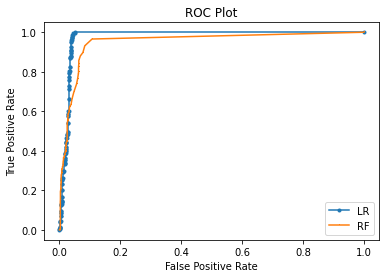

In [36]:
plt.plot(lr_fpr, lr_tpr, marker='.',label='LR')
plt.plot(rf_fpr, rf_tpr, marker=',',label='RF')
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### As the area under curve for logistic regression is larger, it performs better than random forest classifier